In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import math
from decimal import Decimal, ROUND_HALF_UP

In [13]:
df = pd.read_csv("date_tema_1_iaut_2024.csv", decimal=',')
print(df.columns)
print(df.dtypes)
# print(df.Regular_fiber_diet.unique())
# pd.set_option('display.width', 1000)

Index(['Transportation', 'Regular_fiber_diet', 'Diagnostic_in_family_history',
       'High_calorie_diet', 'Sedentary_hours_daily', 'Age', 'Alcohol',
       'Est_avg_calorie_intake', 'Main_meals_daily', 'Snacks', 'Height',
       'Smoker', 'Water_daily', 'Calorie_monitoring', 'Weight',
       'Physical_activity_level', 'Technology_time_use', 'Gender',
       'Diagnostic'],
      dtype='object')
Transportation                   object
Regular_fiber_diet              float64
Diagnostic_in_family_history     object
High_calorie_diet                object
Sedentary_hours_daily           float64
Age                             float64
Alcohol                          object
Est_avg_calorie_intake            int64
Main_meals_daily                float64
Snacks                           object
Height                          float64
Smoker                           object
Water_daily                     float64
Calorie_monitoring               object
Weight                          float64
Ph

In [93]:
print(set(df.Sedentary_hours_daily))
print(df.Sedentary_hours_daily.nlargest(n=10))
print(df.Sedentary_hours_daily.min())
# print("Number of entries with no_main meals having a fractionary part and no snacks: " + str(df.loc[(df["Main_meals_daily"] % 1 != 0 ) & (df["Snacks"] == "no")].shape[0]))


{0, 1, 2, 1306}
801    1306
9         2
19        2
22        2
24        2
25        2
28        2
34        2
49        2
53        2
Name: Technology_time_use, dtype: int64
0


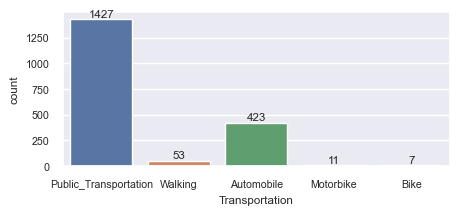

In [4]:
sns.set_theme(rc={'figure.figsize':(5, 2)}, font_scale=0.7)
transportation_frq_plot = sns.countplot(df, x="Transportation")

for i in transportation_frq_plot.containers:
    transportation_frq_plot.bar_label(i,)

(1.0, 3.0)

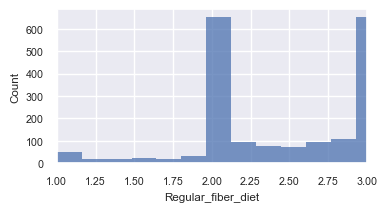

In [88]:
reg_fiber_plt = sns.histplot(data=df, x="Regular_fiber_diet")
reg_fiber_plt.set_xlim(1, 3)

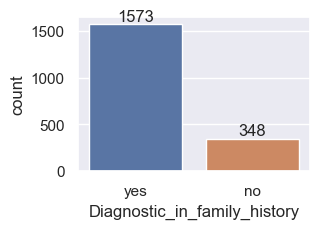

In [5]:
sns.set_theme(rc={'figure.figsize':(3, 2)})
fam_diag_frq_plt = sns.countplot(df, x="Diagnostic_in_family_history")

for i in fam_diag_frq_plt.containers:
    fam_diag_frq_plt.bar_label(i,)

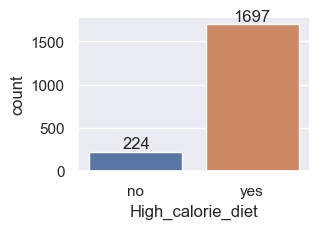

In [6]:
sns.set_theme(rc={'figure.figsize':(3, 2)})
hcal_diet_frq_plt = sns.countplot(df, x="High_calorie_diet")

for i in hcal_diet_frq_plt.containers:
    hcal_diet_frq_plt.bar_label(i,)

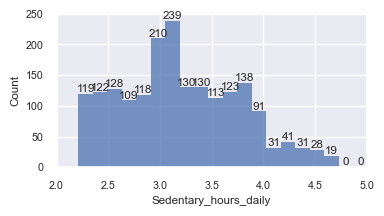

In [82]:
sns.set_theme(rc={'figure.figsize':(4, 2)}, font_scale=0.7)
sedentaryh_frq_plt = sns.histplot(data=df, x="Sedentary_hours_daily")
# sedentaryh_frq_plt = sns.countplot(df, x="Sedentary_hours_daily")
sedentaryh_frq_plt.set_xlim(2, 5)

for i in sedentaryh_frq_plt.containers:
    sedentaryh_frq_plt.bar_label(i,)

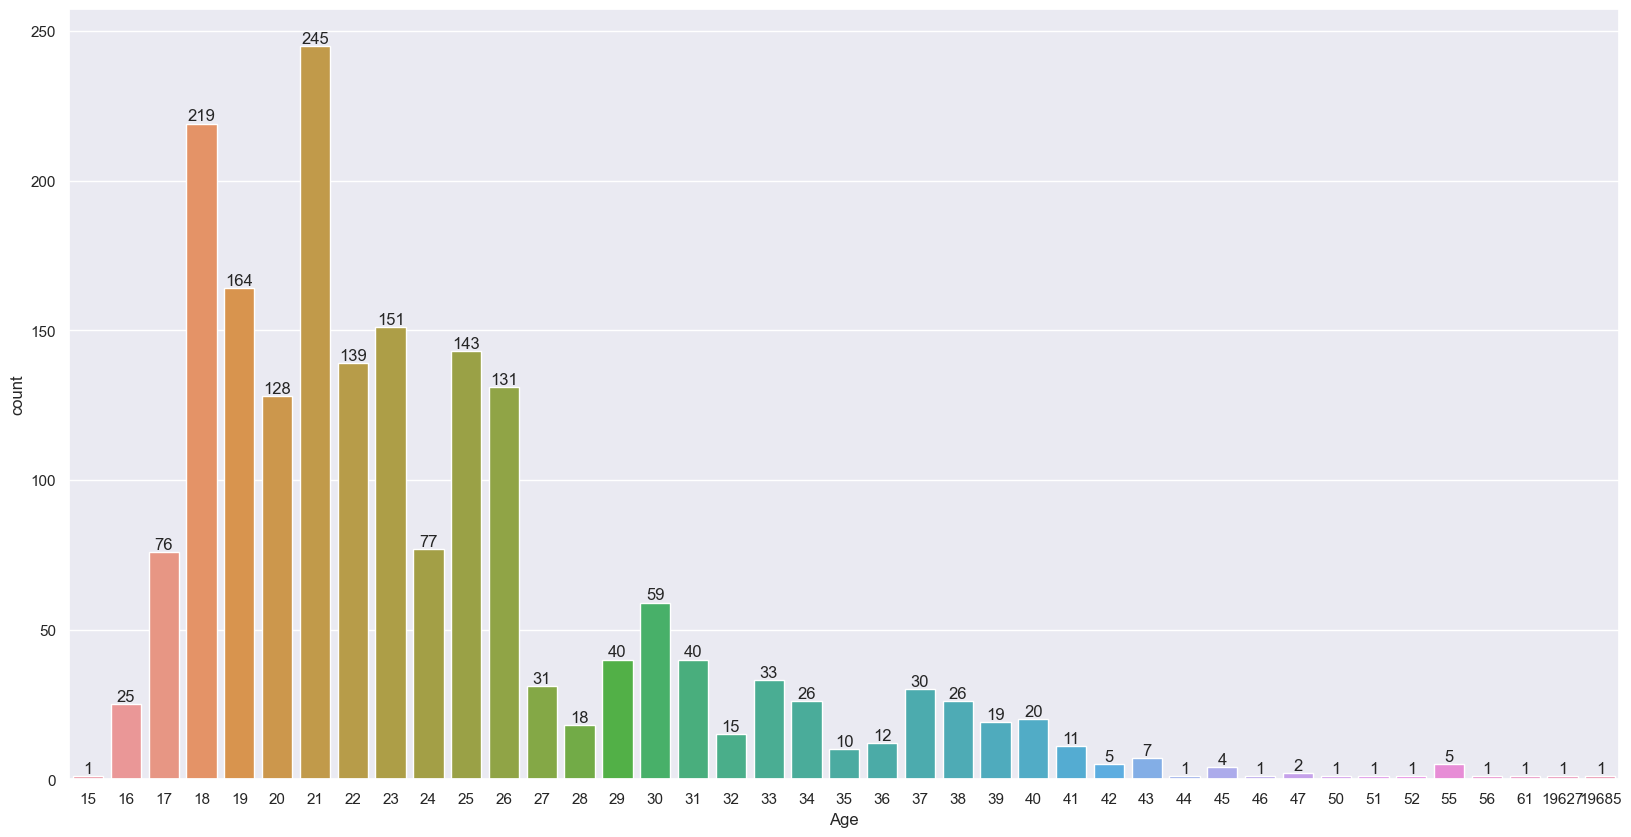

In [22]:
sns.set_theme(rc={'figure.figsize':(20, 10)})
age_frq_plt = sns.countplot(pd.DataFrame(np.floor(df.Age).astype(int), columns=['Age']), x='Age')
# age_frq_plt = sns.countplot(df.Age.astype(int), x='Age')
for i in age_frq_plt.containers:
    age_frq_plt.bar_label(i,)

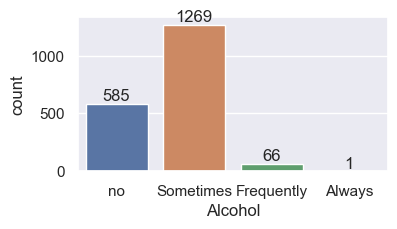

In [23]:
sns.set_theme(rc={'figure.figsize':(4, 2)})
alc_frq_plt = sns.countplot(df, x="Alcohol")
for i in alc_frq_plt.containers:
    alc_frq_plt.bar_label(i,)

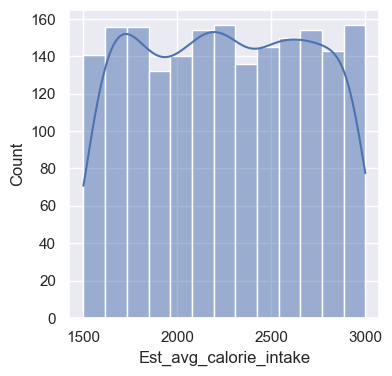

In [31]:
sns.set_theme(rc={'figure.figsize':(4, 4)})
cal_intake_frq_plt = sns.histplot(df, x="Est_avg_calorie_intake", kde=True)
# for i in cal_intake_frq_plt.containers:
#     cal_intake_frq_plt.bar_label(i,)

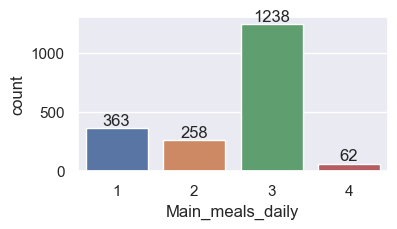

In [44]:
# print("Number of entries with no_main meals having a fractionary part and no snacks: " + str(df.loc[(df["Main_meals_daily"] % 1 != 0 ) & (df["Snacks"] == "no")].shape[0]))

sns.set_theme(rc={'figure.figsize':(4, 2)})
meals_frq_plt = sns.countplot(pd.DataFrame(np.floor(df.Main_meals_daily).astype(int), columns=['Main_meals_daily']), x='Main_meals_daily')
# meals_frq_plt = sns.countplot(df.meals.astype(int), x='meals')
for i in meals_frq_plt.containers:
    meals_frq_plt.bar_label(i,)


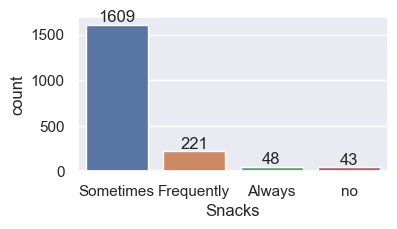

In [9]:
sns.set_theme(rc={'figure.figsize':(4, 2)})

snacks_frq_plt = sns.countplot(df, x="Snacks")

for i in snacks_frq_plt.containers:
    snacks_frq_plt.bar_label(i,)

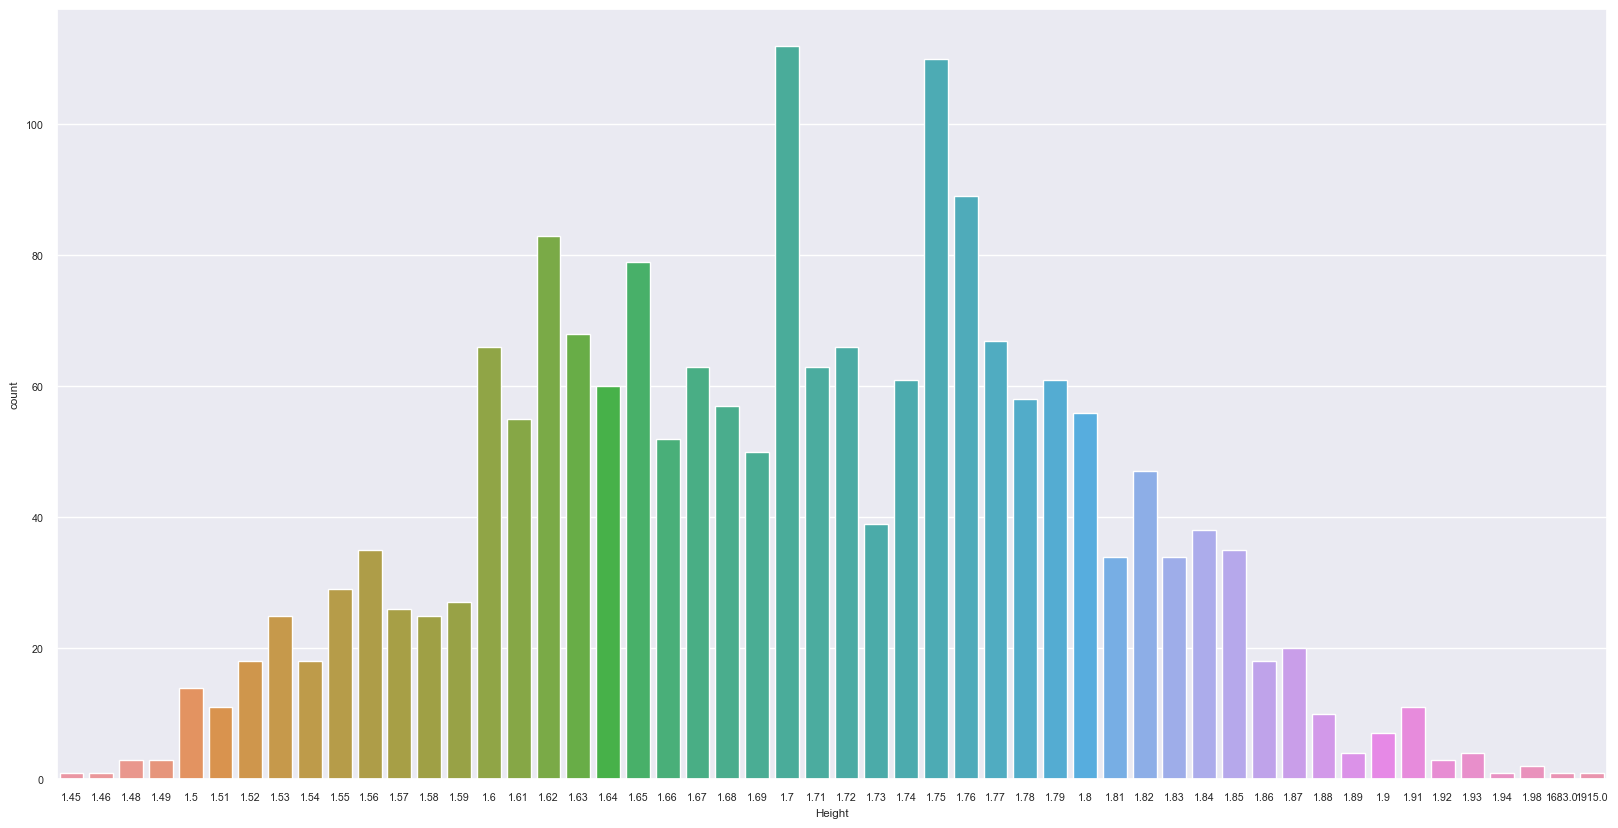

In [51]:
sns.set_theme(rc={'figure.figsize':(20, 10)}, font_scale=0.7)

height_frq_plt = sns.countplot(df, x="Height")

# for i in height_frq_plt.containers:
#     height_frq_plt.bar_label(i,)

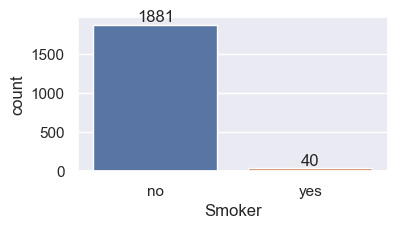

In [52]:
sns.set_theme(rc={'figure.figsize':(4, 2)})

smoker_frq_plt = sns.countplot(df, x="Smoker")

for i in smoker_frq_plt.containers:
    smoker_frq_plt.bar_label(i,)

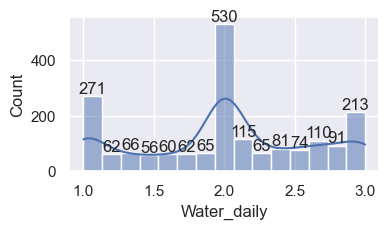

In [124]:
# print(df['Water_daily'].apply(lambda x: x // 1 + 0.5 if x%1 >= 0.25 and x%1 < 0.75 else np.floor(x)).unique())
sns.set_theme(rc={'figure.figsize':(4, 2)})

# water_frq_plt = sns.countplot(pd.DataFrame(df['Water_daily'].apply(lambda x: x // 1 + 0.5 if x%1 >= 0.25 and x%1 < 0.75 else np.floor(x)), columns=['Water_daily']), x="Water_daily")
water_frq_plt = sns.histplot(df, x="Water_daily", kde=True)
for i in water_frq_plt.containers:
    water_frq_plt.bar_label(i,)


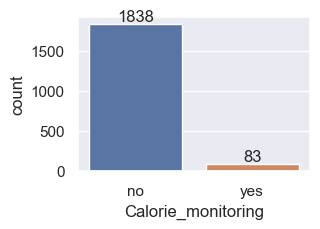

In [63]:
sns.set_theme(rc={'figure.figsize':(3, 2)})
cal_monit_frq_plt = sns.countplot(df, x="Calorie_monitoring")
for i in cal_monit_frq_plt.containers:
    cal_monit_frq_plt.bar_label(i,)

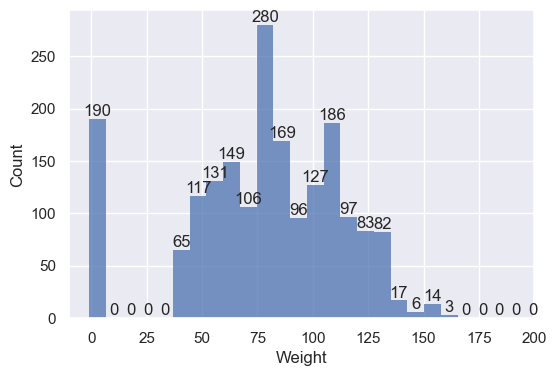

In [88]:
sns.set_theme(rc={'figure.figsize':(6, 4)})

# weight_frq_plt = sns.countplot(pd.DataFrame(df['Weight'].apply(lambda x: x // 1 + 0.5 if x%1 >= 0.25 and x%1 < 0.75 else np.floor(x)), columns=['Weight']), x="Weight")
# weight_frq_plt = sns.countplot(pd.DataFrame(np.floor(df.Weight).astype(int), columns=['Weight']), x='Weight')
# weight_frq_plt = sns.histplot(df, x="Weight", kde=True)
weight_frq_plt = sns.histplot(pd.DataFrame(np.floor(df.Weight).astype(int), columns=['Weight']), x="Weight")
weight_frq_plt.set_xlim(-10, 200)

for i in weight_frq_plt.containers:
    weight_frq_plt.bar_label(i,)

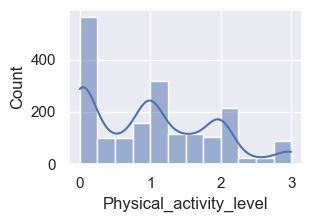

In [5]:
sns.set_theme(rc={'figure.figsize':(3, 2)})
# ph_act_frq_plt = sns.histplot(pd.DataFrame(np.floor(df.Physical_activity_level).astype(int), columns=['Physical_activity_level']), x="Physical_activity_level")
ph_act_frq_plt = sns.histplot(df, x="Physical_activity_level", kde=True)
# ph_act_frq_plt.set_xlim(-10, 200)
# for i in ph_act_frq_plt.containers:
#     ph_act_frq_plt.bar_label(i,)

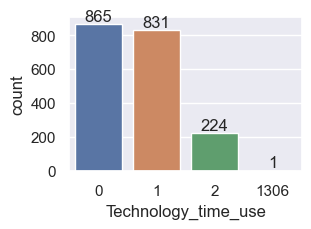

In [89]:
sns.set_theme(rc={'figure.figsize':(3, 2)})
tech_time_frq_plt = sns.countplot(df, x="Technology_time_use")
# ax.bar_label(df.columns, fontsize=10)]
for i in tech_time_frq_plt.containers:
    tech_time_frq_plt.bar_label(i,)

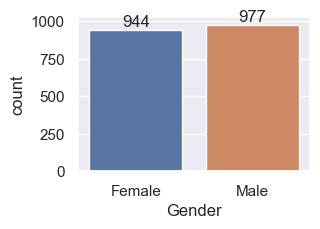

In [10]:
sns.set_theme(rc={'figure.figsize':(3, 2)})
gender_frq_plt = sns.countplot(df, x="Gender")
# ax.bar_label(df.columns, fontsize=10)]
for i in gender_frq_plt.containers:
    gender_frq_plt.bar_label(i,)

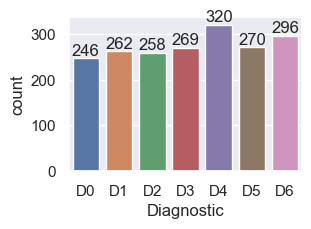

In [91]:
sns.set_theme(rc={'figure.figsize':(3, 2)})
diagnostic_frq_plt = sns.countplot(df, x="Diagnostic", order=sorted(df.Diagnostic.unique()))
# ax.bar_label(df.columns, fontsize=10)]
for i in diagnostic_frq_plt.containers:
    diagnostic_frq_plt.bar_label(i,)

In [71]:
df2 = df.describe(include=[np.number])
dict={}
for column in df2:
	dict[column] = df2[column]["max"] - df2[column]["min"]

# pd.DataFrame(dict.values(), index=dict.keys(), columns=['min_max_diff']).T
df2 = pd.concat([df2, pd.DataFrame(dict.values(), index=dict.keys(), columns=['min_max_diff']).T])

mad = pd.DataFrame(df[df2.columns].mad(), columns=["mad"]).transpose()
df2 = pd.concat([df2, mad])
df2


C:\Users\rober\AppData\Local\Temp\ipykernel_16312\2194261713.py:9: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad = pd.DataFrame(df[df2.columns].mad(), columns=["mad"]).transpose()


,Regular_fiber_diet,Sedentary_hours_daily,Age,Est_avg_calorie_intake,Main_meals_daily,Height,Water_daily,Weight,Physical_activity_level,Technology_time_use
count,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000
mean,3.844937,3.693571,44.792506,2253.687663,2.683472,3.573488,2.010367,205.637344,1.012640,1.345653
std,62.439617,21.759835,633.311837,434.075794,0.779179,58.098160,0.611034,3225.653536,0.855526,29.789928
min,1.000000,2.210000,15.000000,1500.000000,1.000000,1.450000,1.000000,-1.000000,0.000000,0.000000
25%,2.000000,2.770000,19.971660,1871.000000,2.658639,1.630000,1.606076,58.830710,0.115974,0.000000
50%,2.387426,3.130000,22.829753,2253.000000,3.000000,1.700000,2.000000,80.386078,1.000000,1.000000
75%,3.000000,3.640000,26.000000,2628.000000,3.000000,1.770000,2.480555,105.036075,1.683497,1.000000
max,2739.000000,956.580000,19685.000000,3000.000000,4.000000,1915.000000,3.000000,82628.000000,3.000000,1306.000000
min_max_diff,2738.000000,954.370000,19670.000000,1500.000000,3.000000,1913.550000,2.000000,82629.000000,3.000000,1306.000000
mad,2.847637,1.133885,40.946886,375.362344,0.595420,3.738525,0.470801,254.647671,0.702160,1.510909


In [77]:
attr_discr = df.describe(include=[object])
unique_values = {}

for col in attr_discr.columns:
	unique_values[col] = df[col].unique()

print(unique_values)
attr_discr

{'Transportation': array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object), 'Diagnostic_in_family_history': array(['yes', 'no'], dtype=object), 'High_calorie_diet': array(['no', 'yes'], dtype=object), 'Alcohol': array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object), 'Snacks': array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object), 'Smoker': array(['no', 'yes'], dtype=object), 'Calorie_monitoring': array(['no', 'yes'], dtype=object), 'Gender': array(['Female', 'Male'], dtype=object), 'Diagnostic': array(['D1', 'D2', 'D3', 'D4', 'D0', 'D5', 'D6'], dtype=object)}


,Transportation,Diagnostic_in_family_history,High_calorie_diet,Alcohol,Snacks,Smoker,Calorie_monitoring,Gender,Diagnostic
count,1921,1921,1921,1921,1921,1921,1921,1921,1921
unique,5,2,2,4,4,2,2,2,7
top,Public_Transportation,yes,yes,Sometimes,Sometimes,no,no,Male,D4
freq,1427,1573,1697,1269,1609,1881,1838,977,320


In [17]:
df["Transportation"], transp_org = pd.factorize(df["Transportation"])
df["Diagnostic_in_family_history"], diag_hist_org = pd.factorize(df["Diagnostic_in_family_history"])
df["High_calorie_diet"], hcal_org = pd.factorize(df["High_calorie_diet"])
df["Alcohol"], alch_org = pd.factorize(df["Alcohol"])
df["Snacks"], snacks_org = pd.factorize(df["Snacks"])
df["Smoker"], smoker_org = pd.factorize(df["Smoker"])
df["Calorie_monitoring"], cal_mon_org = pd.factorize(df["Calorie_monitoring"])
df["Gender"], gender_org = pd.factorize(df["Gender"])
df["Diagnostic"], diag_org = pd.factorize(df["Diagnostic"])

<AxesSubplot: >

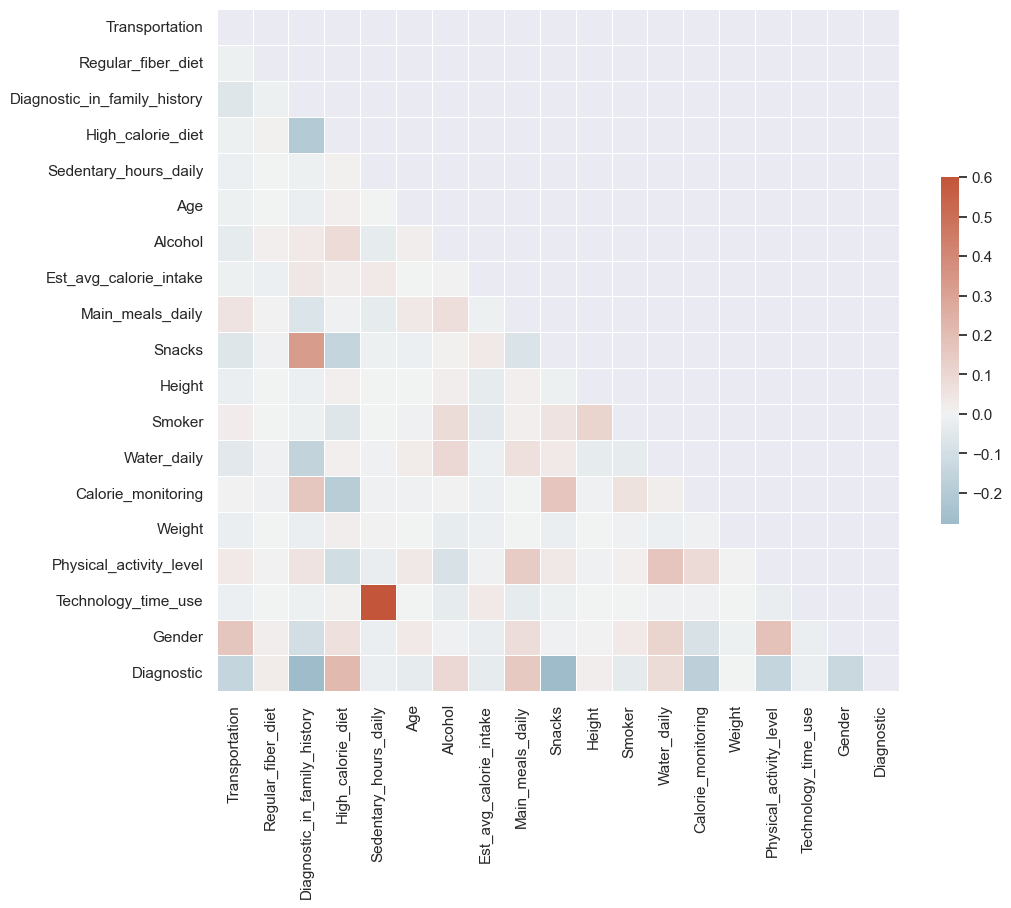

In [175]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
df['Age'] = pd.DataFrame(np.floor(df.Age).astype(int), columns=['Age'])
df['Age'] = df.Age.map(lambda x : x // (10 ** (int(np.log10(x)) - 1)) if int(np.log10(x)) > 3 else x)
df['Regular_fiber_diet'].replace(2739.0, 2.739, inplace=True)
df['Sedentary_hours_daily'].replace(956.58, df.Sedentary_hours_daily.nlargest(2).tolist()[1], inplace=True)
df['Main_meals_daily'] = pd.DataFrame(np.floor(df.Main_meals_daily).astype(int), columns=['Main_meals_daily'])
df['Height'] = df.Height.map(lambda x : x / (10 ** int(np.log10(x))) if int(np.log10(x)) >= 1 else x)

df['Weight'].replace(82628.0, 82.628, inplace=True)
df['Weight'].replace(82039.0, 82.039, inplace=True)
df['Weight'].replace(80539.0, 80.539, inplace=True)
	
df['Technology_time_use'].replace(1306, 1, inplace=True)

In [19]:
# Mean Imputation
mean_imputer = SimpleImputer(missing_values=-1, strategy='mean')
df['Weight'] = mean_imputer.fit_transform(df['Weight'].to_numpy().reshape(-1,1))

<AxesSubplot: >

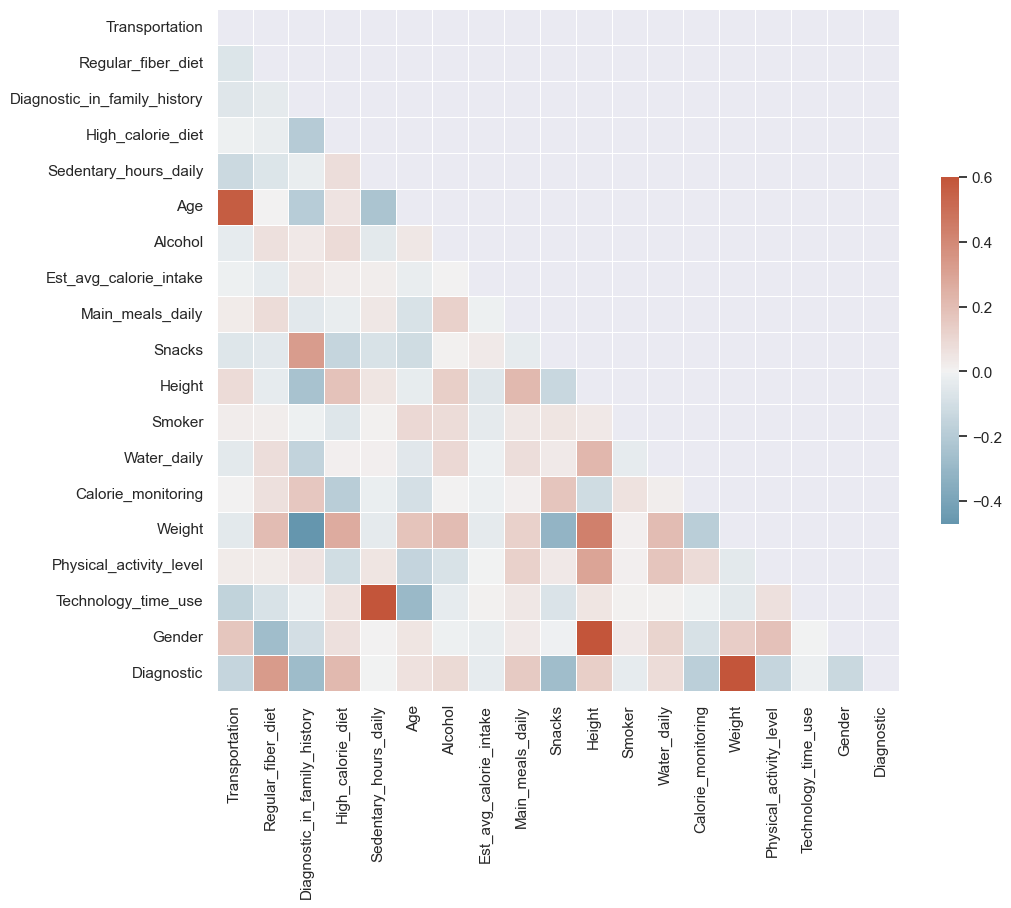

In [228]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [229]:
print(corr.Diagnostic.sort_values(key=lambda x : abs(x)))

Sedentary_hours_daily          -0.002829
Technology_time_use            -0.015710
Est_avg_calorie_intake         -0.036043
Smoker                         -0.038645
Age                             0.061441
Water_daily                     0.081613
Alcohol                         0.094033
Gender                         -0.132271
Height                          0.134737
Physical_activity_level        -0.144771
Transportation                 -0.146906
Main_meals_daily                0.151026
Calorie_monitoring             -0.177705
High_calorie_diet               0.218737
Snacks                         -0.274317
Diagnostic_in_family_history   -0.277579
Regular_fiber_diet              0.329348
Weight                          0.598639
Diagnostic                      1.000000
Name: Diagnostic, dtype: float64


In [230]:
cov = df.cov()
print(cov.Diagnostic.sort_values(key=lambda x : abs(x)))
cov

Sedentary_hours_daily           -0.003254
Smoker                          -0.011013
Technology_time_use             -0.021162
Height                           0.025091
Calorie_monitoring              -0.072110
Alcohol                          0.097250
Water_daily                      0.099499
Gender                          -0.131971
High_calorie_diet                0.140110
Diagnostic_in_family_history    -0.213364
Physical_activity_level         -0.247120
Main_meals_daily                 0.250748
Transportation                  -0.257017
Snacks                          -0.329642
Regular_fiber_diet               0.350327
Age                              0.780691
Diagnostic                       3.980978
Weight                          29.727358
Est_avg_calorie_intake         -31.216057
Name: Diagnostic, dtype: float64


,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
Transportation,0.768880,-0.031908,-0.019744,-0.003155,-0.065464,3.169794,-0.015956,-4.838623,0.018625,-0.031710,0.007332,0.002610,-0.024888,0.000272,-0.948588,0.020724,-0.095660,0.072789,-0.257017
Regular_fiber_diet,-0.031908,0.284215,-0.008873,-0.003861,-0.020504,0.018169,0.018494,-8.318132,0.034867,-0.016179,-0.001702,0.001319,0.024914,0.007369,2.703395,0.011091,-0.030162,-0.073421,0.350327
Diagnostic_in_family_history,-0.019744,-0.008873,0.148416,-0.024699,-0.005098,-0.469075,0.006592,6.864424,-0.015612,0.075627,-0.008853,-0.000649,-0.036532,0.012481,-4.499064,0.017956,-0.006708,-0.019265,-0.213364
High_calorie_diet,-0.003155,-0.003861,-0.024699,0.103063,0.014121,0.111631,0.014435,2.786477,-0.005995,-0.028122,0.005382,-0.002779,0.002342,-0.012147,2.128892,-0.029297,0.013154,0.010898,0.140110
Sedentary_hours_daily,-0.065464,-0.020504,-0.005098,0.014121,0.332451,-0.863855,-0.013881,4.847305,0.017826,-0.028248,0.002654,0.000650,0.003985,-0.002566,-0.585312,0.025958,0.336669,0.000074,-0.003254
Age,3.169794,0.018169,-0.469075,0.111631,-0.863855,40.556142,0.127283,-72.518101,-0.432500,-0.428460,-0.017180,0.087283,-0.209785,-0.124408,28.112762,-0.818085,-1.254857,0.157202,0.780691
Alcohol,-0.015956,0.018494,0.006592,0.014435,-0.013881,0.127283,0.268677,0.293501,0.053053,0.002621,0.006458,0.006128,0.031022,0.000697,2.615309,-0.036450,-0.012246,-0.002635,0.097250
Est_avg_calorie_intake,-4.838623,-8.318132,6.864424,2.786477,4.847305,-72.518101,0.293501,188421.795103,-4.490091,7.664741,-2.278095,-2.613285,-4.249024,-1.236498,-441.691367,-1.738810,2.615517,-5.736378,-31.216057
Main_meals_daily,0.018625,0.034867,-0.015612,-0.005995,0.017826,-0.432500,0.053053,-4.490091,0.692437,-0.018197,0.017043,0.004791,0.038445,0.002519,2.641442,0.086682,0.021535,0.011937,0.250748
Snacks,-0.031710,-0.016179,0.075627,-0.028122,-0.028248,-0.428460,0.002621,7.664741,-0.018197,0.362735,-0.007662,0.004538,0.011368,0.021213,-4.740798,0.018587,-0.031343,-0.002516,-0.329642


<AxesSubplot: xlabel='Regular_fiber_diet'>

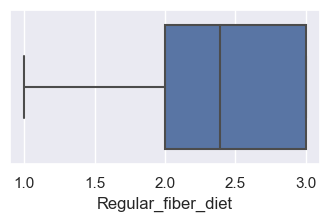

In [208]:
sns.boxplot(x=df["Regular_fiber_diet"])

<AxesSubplot: xlabel='Sedentary_hours_daily'>

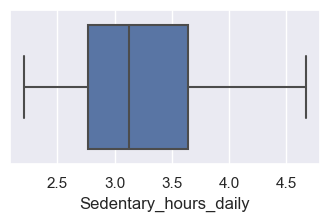

In [231]:
sns.boxplot(x=df["Sedentary_hours_daily"])

<AxesSubplot: xlabel='Age'>

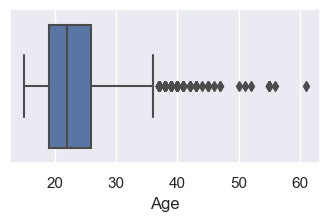

In [191]:
sns.boxplot(x=df["Age"])

<AxesSubplot: xlabel='Est_avg_calorie_intake'>

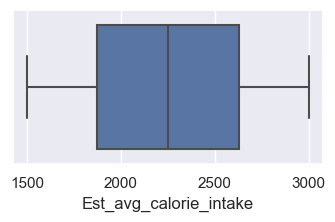

In [192]:
sns.boxplot(x=df["Est_avg_calorie_intake"])

<AxesSubplot: xlabel='Main_meals_daily'>

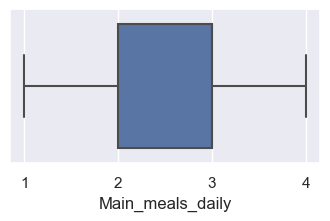

In [193]:
sns.boxplot(x=df["Main_meals_daily"])

<AxesSubplot: xlabel='Height'>

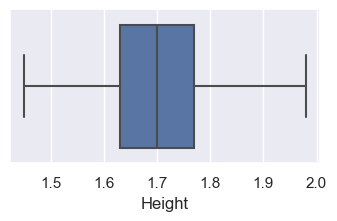

In [203]:
sns.boxplot(x=df["Height"])

<AxesSubplot: xlabel='Water_daily'>

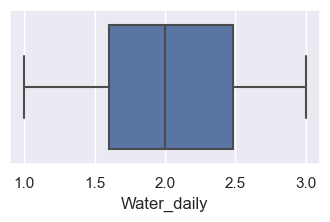

In [204]:
sns.boxplot(x=df["Water_daily"])

<AxesSubplot: xlabel='Weight'>

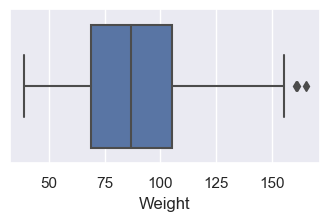

In [205]:
sns.boxplot(x=df["Weight"])

<AxesSubplot: xlabel='Physical_activity_level'>

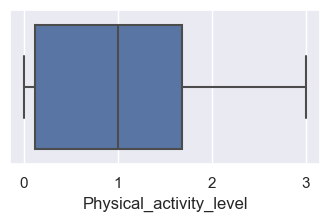

In [206]:
sns.boxplot(x=df["Physical_activity_level"])

<AxesSubplot: xlabel='Technology_time_use'>

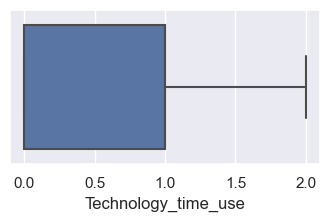

In [207]:
sns.boxplot(x=df["Technology_time_use"])

In [20]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

scaler = RobustScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_norm

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender
0,0.0,-0.387426,0.0,-1.0,0.689655,-0.142857,-1.0,0.291942,0.0,0.0,-0.571429,0.0,0.000000,0.0,-0.630045,-0.637949,0.0,-1.0
1,0.0,0.612574,0.0,-1.0,-0.241379,-0.142857,0.0,0.232497,0.0,0.0,-1.285714,1.0,1.143538,1.0,-0.851070,1.275898,-1.0,-1.0
2,0.0,-0.387426,0.0,-1.0,0.827586,0.142857,1.0,0.532365,0.0,0.0,0.714286,0.0,0.000000,0.0,-0.270879,0.637949,0.0,0.0
3,1.0,0.612574,1.0,-1.0,-0.137931,0.714286,1.0,0.009247,0.0,0.0,0.714286,0.0,0.000000,0.0,0.000000,0.637949,-1.0,0.0
4,0.0,-0.387426,1.0,-1.0,-0.459770,0.000000,0.0,-0.472919,-2.0,0.0,0.571429,0.0,0.000000,0.0,0.082761,-0.637949,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,0.0,0.612574,0.0,0.0,-0.057471,-0.285714,0.0,0.648613,0.0,0.0,0.071429,0.0,-0.310883,0.0,1.232326,0.431425,0.0,-1.0
1917,0.0,0.612574,0.0,0.0,-0.149425,-0.142857,0.0,0.956407,0.0,0.0,0.357143,0.0,0.005866,0.0,1.296822,0.217789,0.0,-1.0
1918,0.0,0.612574,0.0,0.0,0.149425,0.000000,0.0,0.223250,0.0,0.0,0.357143,0.0,0.061972,0.0,1.295341,0.264244,0.0,-1.0
1919,0.0,0.612574,0.0,0.0,0.551724,0.285714,0.0,0.157199,0.0,0.0,0.285714,0.0,0.974682,0.0,1.285873,0.088743,0.0,-1.0


In [107]:
def variance_threshold_selector(data, threshold):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

selected_variance = variance_threshold_selector(X_norm, (.5 * (1 - .5)))
selected_variance

,Transportation,Regular_fiber_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Water_daily,Weight,Physical_activity_level,Technology_time_use
0,0.0,-0.387426,0.689655,-0.142857,-1.0,0.291942,0.0,0.0,-0.571429,0.000000,-0.630045,-0.637949,0.0
1,0.0,0.612574,-0.241379,-0.142857,0.0,0.232497,0.0,0.0,-1.285714,1.143538,-0.851070,1.275898,-1.0
2,0.0,-0.387426,0.827586,0.142857,1.0,0.532365,0.0,0.0,0.714286,0.000000,-0.270879,0.637949,0.0
3,1.0,0.612574,-0.137931,0.714286,1.0,0.009247,0.0,0.0,0.714286,0.000000,0.000000,0.637949,-1.0
4,0.0,-0.387426,-0.459770,0.000000,0.0,-0.472919,-2.0,0.0,0.571429,0.000000,0.082761,-0.637949,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,0.0,0.612574,-0.057471,-0.285714,0.0,0.648613,0.0,0.0,0.071429,-0.310883,1.232326,0.431425,0.0
1917,0.0,0.612574,-0.149425,-0.142857,0.0,0.956407,0.0,0.0,0.357143,0.005866,1.296822,0.217789,0.0
1918,0.0,0.612574,0.149425,0.000000,0.0,0.223250,0.0,0.0,0.357143,0.061972,1.295341,0.264244,0.0
1919,0.0,0.612574,0.551724,0.285714,0.0,0.157199,0.0,0.0,0.285714,0.974682,1.285873,0.088743,0.0


In [110]:
print(selected_variance.columns)

Index(['Transportation', 'Regular_fiber_diet', 'Sedentary_hours_daily', 'Age',
       'Alcohol', 'Est_avg_calorie_intake', 'Main_meals_daily', 'Snacks',
       'Height', 'Water_daily', 'Weight', 'Physical_activity_level',
       'Technology_time_use'],
      dtype='object')


In [108]:
def f_classif_percentile_selector(data, target, percentile=2):
    selector = SelectPercentile(f_classif, percentile=percentile)
    selector.fit(data, target)
    return data[data.columns[selector.get_support(indices=True)]]

selected_f_classif = f_classif_percentile_selector(X_norm, y, 50) # era cu 40
selected_f_classif

,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Age,Main_meals_daily,Snacks,Height,Weight,Gender
0,-0.387426,0.0,-1.0,-0.142857,0.0,0.0,-0.571429,-0.630045,-1.0
1,0.612574,0.0,-1.0,-0.142857,0.0,0.0,-1.285714,-0.851070,-1.0
2,-0.387426,0.0,-1.0,0.142857,0.0,0.0,0.714286,-0.270879,0.0
3,0.612574,1.0,-1.0,0.714286,0.0,0.0,0.714286,0.000000,0.0
4,-0.387426,1.0,-1.0,0.000000,-2.0,0.0,0.571429,0.082761,0.0
...,...,...,...,...,...,...,...,...,...
1916,0.612574,0.0,0.0,-0.285714,0.0,0.0,0.071429,1.232326,-1.0
1917,0.612574,0.0,0.0,-0.142857,0.0,0.0,0.357143,1.296822,-1.0
1918,0.612574,0.0,0.0,0.000000,0.0,0.0,0.357143,1.295341,-1.0
1919,0.612574,0.0,0.0,0.285714,0.0,0.0,0.285714,1.285873,-1.0


In [111]:
print(selected_f_classif.columns)

Index(['Regular_fiber_diet', 'Diagnostic_in_family_history',
       'High_calorie_diet', 'Age', 'Main_meals_daily', 'Snacks', 'Height',
       'Weight', 'Gender'],
      dtype='object')


In [23]:
discrete_features = ["Transportation", "Diagnostic_in_family_history", "High_calorie_diet", "Alcohol", "Snacks", "Smoker", "Calorie_monitoring", "Gender"]
params = {"discrete_features" : discrete_features}

# for col in X_norm.columns:
# 	print(type(X_norm[col][0]))
      
def mutual_info_percentile_selector(data, target, percentile=2):
    # selector.set_params(**params)
    # mi = mutual_info_classif(data, target, discrete_features=discrete_features)
    selector = SelectPercentile(mutual_info_classif, percentile=percentile)
    selector.fit(data, target)
    return data[data.columns[selector.get_support(indices=True)]]

selected_mi = mutual_info_percentile_selector(X_norm, y, 50)
selected_mi

,Regular_fiber_diet,Age,Main_meals_daily,Snacks,Height,Water_daily,Weight,Physical_activity_level,Gender
0,-0.387426,-0.142857,0.0,0.0,-0.571429,0.000000,-0.630045,-0.637949,-1.0
1,0.612574,-0.142857,0.0,0.0,-1.285714,1.143538,-0.851070,1.275898,-1.0
2,-0.387426,0.142857,0.0,0.0,0.714286,0.000000,-0.270879,0.637949,0.0
3,0.612574,0.714286,0.0,0.0,0.714286,0.000000,0.000000,0.637949,0.0
4,-0.387426,0.000000,-2.0,0.0,0.571429,0.000000,0.082761,-0.637949,0.0
...,...,...,...,...,...,...,...,...,...
1916,0.612574,-0.285714,0.0,0.0,0.071429,-0.310883,1.232326,0.431425,-1.0
1917,0.612574,-0.142857,0.0,0.0,0.357143,0.005866,1.296822,0.217789,-1.0
1918,0.612574,0.000000,0.0,0.0,0.357143,0.061972,1.295341,0.264244,-1.0
1919,0.612574,0.285714,0.0,0.0,0.285714,0.974682,1.285873,0.088743,-1.0


In [106]:
print(selected_mi.columns)

Index(['Regular_fiber_diet', 'Age', 'Main_meals_daily', 'Snacks', 'Height',
       'Water_daily', 'Weight', 'Physical_activity_level', 'Gender'],
      dtype='object')


In [112]:
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
X_var_train, X_var_test, y_var_train, y_var_test = train_test_split(selected_variance, y, test_size=0.2, random_state=42)
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(selected_f_classif, y, test_size=0.2, random_state=42)
X_mi_train, X_mi_test, y_mi_train, y_mi_test = train_test_split(selected_mi, y, test_size=0.2, random_state=42)

In [113]:
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro', 
           'recall': 'recall_macro', 
           'f1': 'f1_macro'}

In [114]:

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['rbf', 'linear']}

In [115]:
grid_svc_var = GridSearchCV(SVC(), param_grid, refit = True) 
grid_svc_var.fit(X_var_train, y_var_train) 
print("Selected using variance threshold: ", grid_svc_var.best_score_, grid_svc_var.best_params_)

Selected using variance threshold:  0.845697787554465 {'C': 10, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.65      0.62      0.63        52
           1       0.63      0.79      0.70        42
           2       0.72      0.73      0.73        49
           3       0.80      0.75      0.78        69
           4       0.86      0.73      0.79        60
           5       0.86      0.90      0.88        60
           6       0.95      0.98      0.96        53

    accuracy                           0.79       385
   macro avg       0.78      0.79      0.78       385
weighted avg       0.79      0.79      0.79       385



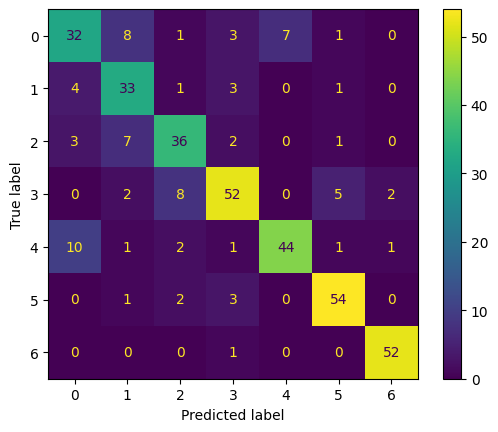

In [185]:
y_pred = grid_svc_var.predict(X_var_test)
cm = confusion_matrix(y_var_test, y_pred)
report = classification_report(y_var_test, y_pred, output_dict=True)
df_var = pd.DataFrame(report).transpose()
print(classification_report(y_var_test, y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [153]:
df_var

,precision,recall,f1-score,support
0,0.653061,0.615385,0.633663,52.000000
1,0.634615,0.785714,0.702128,42.000000
2,0.720000,0.734694,0.727273,49.000000
3,0.800000,0.753623,0.776119,69.000000
4,0.862745,0.733333,0.792793,60.000000
5,0.857143,0.900000,0.878049,60.000000
6,0.945455,0.981132,0.962963,53.000000
accuracy,0.787013,0.787013,0.787013,0.787013
macro avg,0.781860,0.786269,0.781855,385.000000
weighted avg,0.790637,0.787013,0.786795,385.000000


In [117]:
grid_svc_mi = GridSearchCV(SVC(), param_grid, refit = True) 
grid_svc_mi.fit(X_mi_train, y_mi_train) 
print("Selected using mutual information: ", grid_svc_mi.best_score_, grid_svc_mi.best_params_)

Selected using mutual information:  0.8593785693134226 {'C': 10, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.74      0.67      0.71        52
           1       0.64      0.69      0.67        42
           2       0.73      0.92      0.81        49
           3       0.95      0.81      0.87        69
           4       0.84      0.78      0.81        60
           5       0.93      0.93      0.93        60
           6       0.95      1.00      0.97        53

    accuracy                           0.83       385
   macro avg       0.83      0.83      0.83       385
weighted avg       0.84      0.83      0.83       385



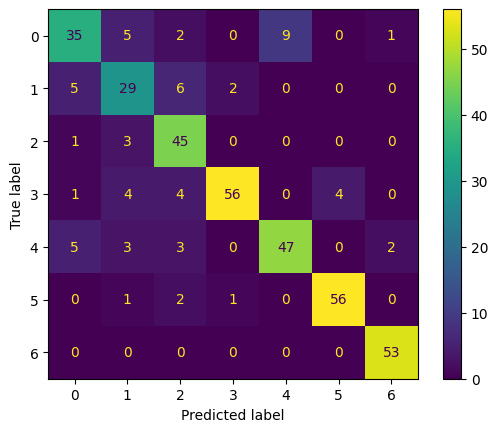

In [154]:
y_pred = grid_svc_mi.predict(X_mi_test)
cm = confusion_matrix(y_mi_test, y_pred)
report = classification_report(y_mi_test, y_pred, output_dict=True)
df_mi = pd.DataFrame(report).transpose()
print(classification_report(y_mi_test, y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [155]:
df_mi

,precision,recall,f1-score,support
0,0.744681,0.673077,0.707071,52.000000
1,0.644444,0.690476,0.666667,42.000000
2,0.725806,0.918367,0.810811,49.000000
3,0.949153,0.811594,0.875000,69.000000
4,0.839286,0.783333,0.810345,60.000000
5,0.933333,0.933333,0.933333,60.000000
6,0.946429,1.000000,0.972477,53.000000
accuracy,0.833766,0.833766,0.833766,0.833766
macro avg,0.826162,0.830026,0.825100,385.000000
weighted avg,0.839906,0.833766,0.833856,385.000000


In [119]:
grid_svc_f = GridSearchCV(SVC(), param_grid, refit = True) 
grid_svc_f.fit(X_f_train, y_f_train) 
print("Selected using f-classif: ",grid_svc_f.best_score_, grid_svc_f.best_params_)

Selected using f-classif:  0.8626295528575658 {'C': 10, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.75      0.81      0.78        52
           1       0.68      0.76      0.72        42
           2       0.70      0.86      0.77        49
           3       0.92      0.80      0.85        69
           4       0.92      0.78      0.85        60
           5       0.93      0.90      0.92        60
           6       1.00      1.00      1.00        53

    accuracy                           0.84       385
   macro avg       0.84      0.84      0.84       385
weighted avg       0.86      0.84      0.85       385



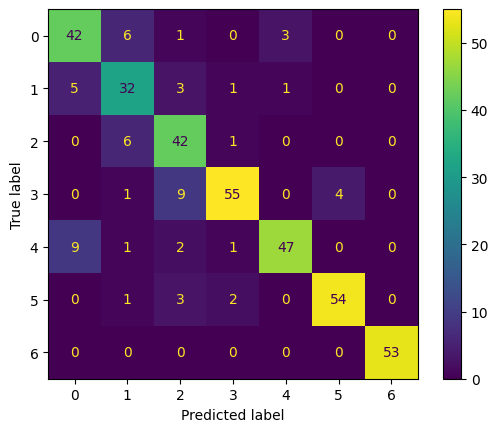

In [156]:
y_pred = grid_svc_f.predict(X_f_test)
cm = confusion_matrix(y_f_test, y_pred)
report = classification_report(y_f_test, y_pred, output_dict=True)
df_f = pd.DataFrame(report).transpose()
print(classification_report(y_f_test, y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [157]:
df_f

,precision,recall,f1-score,support
0,0.750000,0.807692,0.777778,52.000000
1,0.680851,0.761905,0.719101,42.000000
2,0.700000,0.857143,0.770642,49.000000
3,0.916667,0.797101,0.852713,69.000000
4,0.921569,0.783333,0.846847,60.000000
5,0.931034,0.900000,0.915254,60.000000
6,1.000000,1.000000,1.000000,53.000000
accuracy,0.844156,0.844156,0.844156,0.844156
macro avg,0.842874,0.843882,0.840334,385.000000
weighted avg,0.855330,0.844156,0.846679,385.000000


In [121]:
grid_svc = GridSearchCV(SVC(), param_grid, refit = True) 
grid_svc.fit(X_norm_train, y_norm_train) 
print("No selection: ",grid_svc.best_score_, grid_svc.best_params_)

No selection:  0.8632746732095267 {'C': 10, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.60      0.69      0.64        52
           1       0.66      0.74      0.70        42
           2       0.78      0.88      0.83        49
           3       0.91      0.77      0.83        69
           4       0.90      0.73      0.81        60
           5       0.89      0.92      0.90        60
           6       0.96      0.98      0.97        53

    accuracy                           0.82       385
   macro avg       0.81      0.82      0.81       385
weighted avg       0.83      0.82      0.82       385



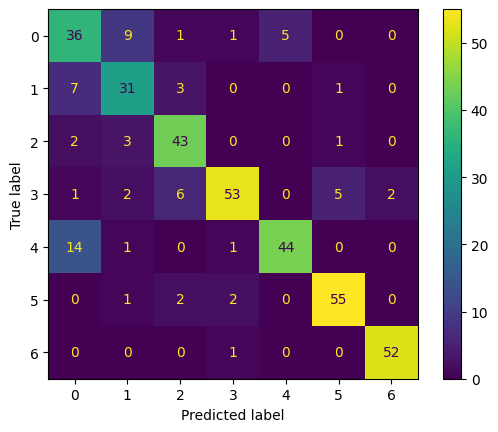

In [158]:
y_pred = grid_svc.predict(X_norm_test)
cm = confusion_matrix(y_norm_test, y_pred)
report = classification_report(y_norm_test, y_pred, output_dict=True)
df_norm = pd.DataFrame(report).transpose()
print(classification_report(y_norm_test, y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [159]:
df_norm

,precision,recall,f1-score,support
0,0.600000,0.692308,0.642857,52.000000
1,0.659574,0.738095,0.696629,42.000000
2,0.781818,0.877551,0.826923,49.000000
3,0.913793,0.768116,0.834646,69.000000
4,0.897959,0.733333,0.807339,60.000000
5,0.887097,0.916667,0.901639,60.000000
6,0.962963,0.981132,0.971963,53.000000
accuracy,0.815584,0.815584,0.815584,0.815584
macro avg,0.814744,0.815315,0.811714,385.000000
weighted avg,0.827022,0.815584,0.817791,385.000000


In [123]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [124]:
grid_rf_var = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv = 5) 
grid_rf_var.fit(X_var_train, y_var_train) 
print("Selected using variance threshold: ", grid_rf_var.best_score_, grid_rf_var.best_params_)

Selected using variance threshold:  0.8867337873852531 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


              precision    recall  f1-score   support

           0       0.75      0.81      0.78        52
           1       0.74      0.76      0.75        42
           2       0.73      0.82      0.77        49
           3       0.90      0.83      0.86        69
           4       0.96      0.80      0.87        60
           5       0.95      0.95      0.95        60
           6       0.90      0.98      0.94        53

    accuracy                           0.85       385
   macro avg       0.85      0.85      0.85       385
weighted avg       0.86      0.85      0.85       385



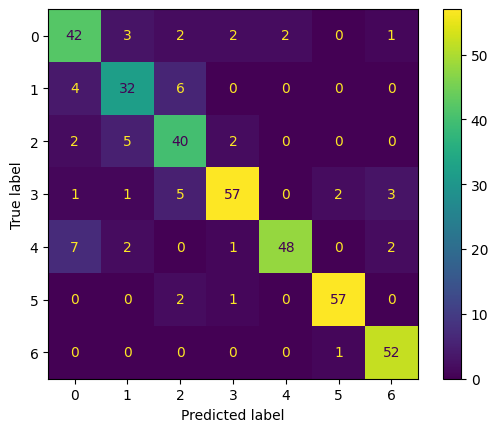

In [160]:
y_pred = grid_rf_var.predict(X_var_test)
cm = confusion_matrix(y_var_test, y_pred)
report = classification_report(y_var_test, y_pred, output_dict=True)
df_rf_var = pd.DataFrame(report).transpose()
print(classification_report(y_var_test, y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [161]:
df_rf_var

,precision,recall,f1-score,support
0,0.750000,0.807692,0.777778,52.000000
1,0.744186,0.761905,0.752941,42.000000
2,0.727273,0.816327,0.769231,49.000000
3,0.904762,0.826087,0.863636,69.000000
4,0.960000,0.800000,0.872727,60.000000
5,0.950000,0.950000,0.950000,60.000000
6,0.896552,0.981132,0.936937,53.000000
accuracy,0.851948,0.851948,0.851948,0.851948
macro avg,0.847539,0.849020,0.846179,385.000000
weighted avg,0.858280,0.851948,0.852916,385.000000


In [126]:
grid_rf_mi = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv = 5) 
grid_rf_mi.fit(X_mi_train, y_mi_train) 
print("Selected using mutual information: ", grid_rf_mi.best_score_, grid_rf_mi.best_params_)

Selected using mutual information:  0.8899720800372265 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


              precision    recall  f1-score   support

           0       0.79      0.85      0.81        52
           1       0.76      0.76      0.76        42
           2       0.67      0.88      0.76        49
           3       0.95      0.81      0.87        69
           4       0.96      0.78      0.86        60
           5       0.98      0.97      0.97        60
           6       0.95      1.00      0.97        53

    accuracy                           0.86       385
   macro avg       0.87      0.86      0.86       385
weighted avg       0.88      0.86      0.87       385



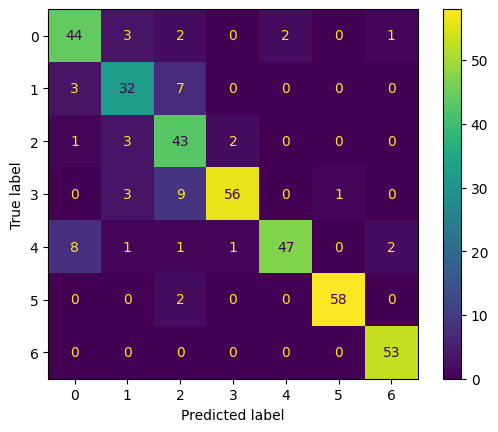

In [162]:
y_pred = grid_rf_mi.predict(X_mi_test)
cm = confusion_matrix(y_mi_test, y_pred)
report = classification_report(y_mi_test, y_pred, output_dict=True)
df_rf_mi = pd.DataFrame(report).transpose()
print(classification_report(y_mi_test, y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [163]:
df_rf_mi

,precision,recall,f1-score,support
0,0.785714,0.846154,0.814815,52.000000
1,0.761905,0.761905,0.761905,42.000000
2,0.671875,0.877551,0.761062,49.000000
3,0.949153,0.811594,0.875000,69.000000
4,0.959184,0.783333,0.862385,60.000000
5,0.983051,0.966667,0.974790,60.000000
6,0.946429,1.000000,0.972477,53.000000
accuracy,0.864935,0.864935,0.864935,0.864935
macro avg,0.865330,0.863886,0.860348,385.000000
weighted avg,0.877832,0.864935,0.867037,385.000000


In [128]:
grid_rf_f = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv = 5) 
grid_rf_f.fit(X_f_train, y_f_train) 
print("Selected using f-classif: ", grid_rf_f.best_score_, grid_rf_f.best_params_)

Selected using f-classif:  0.8893100384957062 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


              precision    recall  f1-score   support

           0       0.75      0.88      0.81        52
           1       0.84      0.76      0.80        42
           2       0.69      0.92      0.79        49
           3       0.91      0.84      0.87        69
           4       0.96      0.75      0.84        60
           5       1.00      0.93      0.97        60
           6       0.98      1.00      0.99        53

    accuracy                           0.87       385
   macro avg       0.88      0.87      0.87       385
weighted avg       0.88      0.87      0.87       385



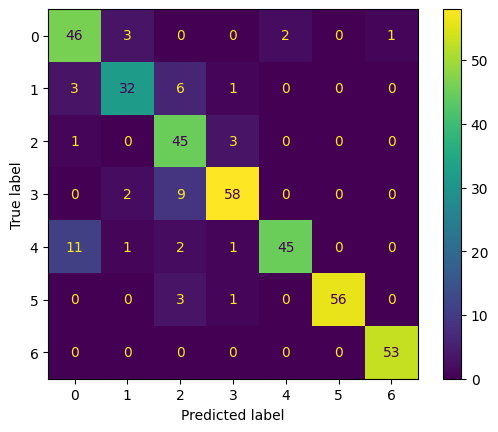

In [164]:
y_pred = grid_rf_f.predict(X_f_test)
cm = confusion_matrix(y_f_test, y_pred)
report = classification_report(y_f_test, y_pred, output_dict=True)
df_rf_f = pd.DataFrame(report).transpose()
print(classification_report(y_f_test, y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [165]:
df_rf_f

,precision,recall,f1-score,support
0,0.754098,0.884615,0.814159,52.00000
1,0.842105,0.761905,0.800000,42.00000
2,0.692308,0.918367,0.789474,49.00000
3,0.906250,0.840580,0.872180,69.00000
4,0.957447,0.750000,0.841121,60.00000
5,1.000000,0.933333,0.965517,60.00000
6,0.981481,1.000000,0.990654,53.00000
accuracy,0.870130,0.870130,0.870130,0.87013
macro avg,0.876241,0.869829,0.867587,385.00000
weighted avg,0.884419,0.870130,0.871958,385.00000


In [130]:
grid_rf_norm = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv = 5) 
grid_rf_norm.fit(X_norm_train, y_norm_train) 
print("No selection: ", grid_rf_norm.best_score_, grid_rf_norm.best_params_)

No selection:  0.9016921189559625 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


              precision    recall  f1-score   support

           0       0.73      0.85      0.79        52
           1       0.79      0.79      0.79        42
           2       0.69      0.86      0.76        49
           3       0.93      0.81      0.87        69
           4       0.98      0.78      0.87        60
           5       0.97      0.95      0.96        60
           6       0.96      1.00      0.98        53

    accuracy                           0.86       385
   macro avg       0.86      0.86      0.86       385
weighted avg       0.88      0.86      0.86       385



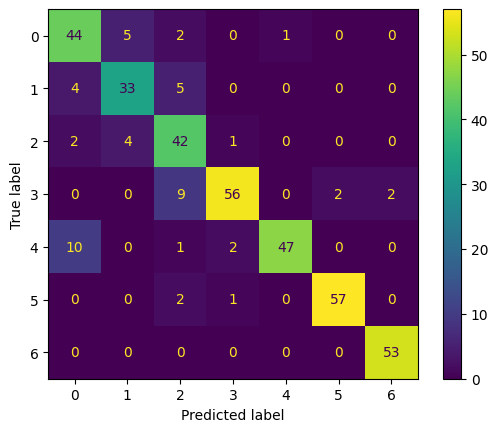

In [166]:
y_pred = grid_rf_norm.predict(X_norm_test)
cm = confusion_matrix(y_norm_test, y_pred)
report = classification_report(y_norm_test, y_pred, output_dict=True)
df_rf_norm = pd.DataFrame(report).transpose()
print(classification_report(y_norm_test, y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [167]:
df_rf_norm

,precision,recall,f1-score,support
0,0.733333,0.846154,0.785714,52.000000
1,0.785714,0.785714,0.785714,42.000000
2,0.688525,0.857143,0.763636,49.000000
3,0.933333,0.811594,0.868217,69.000000
4,0.979167,0.783333,0.870370,60.000000
5,0.966102,0.950000,0.957983,60.000000
6,0.963636,1.000000,0.981481,53.000000
accuracy,0.862338,0.862338,0.862338,0.862338
macro avg,0.864259,0.861991,0.859017,385.000000
weighted avg,0.875480,0.862338,0.864681,385.000000


In [132]:
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [10, 20, 30],
	"criterion": ["gini", "entropy", "log_loss"],
	"max_samples": [0.2, 0.5, 0.8, 1]
}


In [133]:
grid_ext_var = GridSearchCV(ExtraTreesClassifier(random_state=42, bootstrap=True), param_grid, cv = 5) 
grid_ext_var.fit(X_var_train, y_var_train) 
print("Selected using variance threshold: ", grid_ext_var.best_score_, grid_ext_var.best_params_)

Selected using variance threshold:  0.8906341215787471 {'criterion': 'gini', 'max_depth': 30, 'max_samples': 0.8, 'n_estimators': 500}


              precision    recall  f1-score   support

           0       0.72      0.73      0.72        52
           1       0.76      0.81      0.78        42
           2       0.79      0.84      0.81        49
           3       0.92      0.83      0.87        69
           4       0.92      0.82      0.87        60
           5       0.94      0.97      0.95        60
           6       0.90      0.98      0.94        53

    accuracy                           0.85       385
   macro avg       0.85      0.85      0.85       385
weighted avg       0.86      0.85      0.85       385



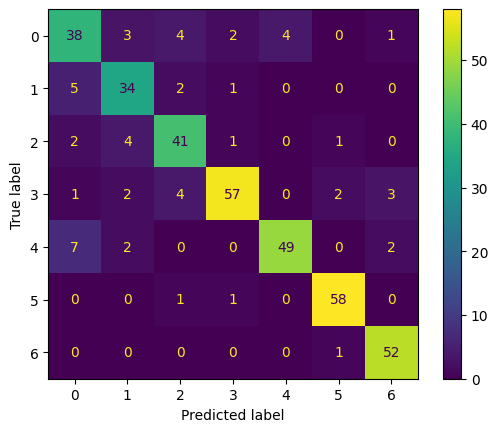

In [168]:
y_pred = grid_ext_var.predict(X_var_test)
cm = confusion_matrix(y_var_test, y_pred)
report = classification_report(y_var_test, y_pred, output_dict=True)
df_ex_var = pd.DataFrame(report).transpose()
print(classification_report(y_var_test, y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [169]:
df_ex_var

,precision,recall,f1-score,support
0,0.716981,0.730769,0.723810,52.000000
1,0.755556,0.809524,0.781609,42.000000
2,0.788462,0.836735,0.811881,49.000000
3,0.919355,0.826087,0.870229,69.000000
4,0.924528,0.816667,0.867257,60.000000
5,0.935484,0.966667,0.950820,60.000000
6,0.896552,0.981132,0.936937,53.000000
accuracy,0.854545,0.854545,0.854545,0.854545
macro avg,0.848131,0.852511,0.848935,385.000000
weighted avg,0.857674,0.854545,0.854639,385.000000


In [135]:
grid_ext_mi = GridSearchCV(ExtraTreesClassifier(random_state=42, bootstrap=True), param_grid, cv = 5) 
grid_ext_mi.fit(X_mi_train, y_mi_train) 
print("Selected using mutual information: ", grid_ext_mi.best_score_, grid_ext_mi.best_params_)

Selected using mutual information:  0.8964909683150726 {'criterion': 'entropy', 'max_depth': 20, 'max_samples': 0.8, 'n_estimators': 100}


              precision    recall  f1-score   support

           0       0.78      0.81      0.79        52
           1       0.84      0.86      0.85        42
           2       0.78      0.92      0.84        49
           3       0.97      0.87      0.92        69
           4       0.92      0.80      0.86        60
           5       0.98      0.98      0.98        60
           6       0.95      1.00      0.97        53

    accuracy                           0.89       385
   macro avg       0.89      0.89      0.89       385
weighted avg       0.90      0.89      0.89       385



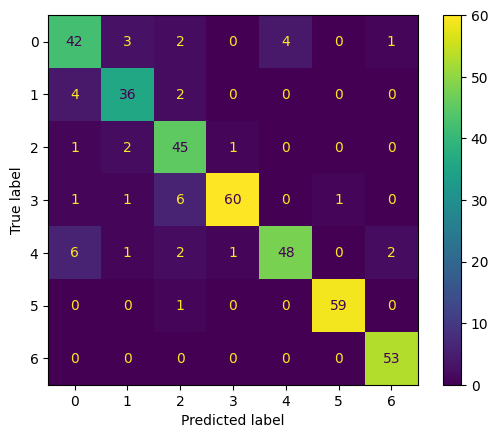

In [170]:
y_pred = grid_ext_mi.predict(X_mi_test)
cm = confusion_matrix(y_mi_test, y_pred)
report = classification_report(y_mi_test, y_pred, output_dict=True)
df_ex_mi = pd.DataFrame(report).transpose()
print(classification_report(y_mi_test, y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [171]:
df_ex_mi

,precision,recall,f1-score,support
0,0.777778,0.807692,0.792453,52.000000
1,0.837209,0.857143,0.847059,42.000000
2,0.775862,0.918367,0.841121,49.000000
3,0.967742,0.869565,0.916031,69.000000
4,0.923077,0.800000,0.857143,60.000000
5,0.983333,0.983333,0.983333,60.000000
6,0.946429,1.000000,0.972477,53.000000
accuracy,0.890909,0.890909,0.890909,0.890909
macro avg,0.887347,0.890872,0.887088,385.000000
weighted avg,0.895958,0.890909,0.891363,385.000000


In [137]:
grid_ext_f = GridSearchCV(ExtraTreesClassifier(random_state=42, bootstrap=True), param_grid, cv = 5) 
grid_ext_f.fit(X_f_train, y_f_train) 
print("Selected using f-classif: ", grid_ext_f.best_score_, grid_ext_f.best_params_)

Selected using f-classif:  0.8971318583696434 {'criterion': 'gini', 'max_depth': 20, 'max_samples': 0.8, 'n_estimators': 100}


              precision    recall  f1-score   support

           0       0.75      0.90      0.82        52
           1       0.89      0.81      0.85        42
           2       0.77      0.96      0.85        49
           3       0.95      0.84      0.89        69
           4       0.94      0.77      0.84        60
           5       0.97      0.97      0.97        60
           6       1.00      1.00      1.00        53

    accuracy                           0.89       385
   macro avg       0.90      0.89      0.89       385
weighted avg       0.90      0.89      0.89       385



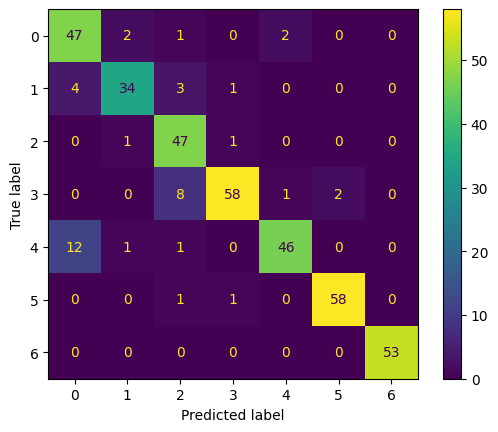

In [172]:
y_pred = grid_ext_f.predict(X_f_test)
cm = confusion_matrix(y_f_test, y_pred)
report = classification_report(y_f_test, y_pred, output_dict=True)
df_ex_f = pd.DataFrame(report).transpose()
print(classification_report(y_f_test, y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [173]:
df_ex_f

,precision,recall,f1-score,support
0,0.746032,0.903846,0.817391,52.000000
1,0.894737,0.809524,0.850000,42.000000
2,0.770492,0.959184,0.854545,49.000000
3,0.950820,0.840580,0.892308,69.000000
4,0.938776,0.766667,0.844037,60.000000
5,0.966667,0.966667,0.966667,60.000000
6,1.000000,1.000000,1.000000,53.000000
accuracy,0.890909,0.890909,0.890909,0.890909
macro avg,0.895360,0.892352,0.889278,385.000000
weighted avg,0.901454,0.890909,0.891658,385.000000


In [139]:
grid_ext_norm = GridSearchCV(ExtraTreesClassifier(random_state=42, bootstrap=True), param_grid, cv = 5) 
grid_ext_norm.fit(X_norm_train, y_norm_train) 
print("No selection: ", grid_ext_norm.best_score_, grid_ext_norm.best_params_)

No selection:  0.9010343077118321 {'criterion': 'entropy', 'max_depth': 20, 'max_samples': 0.8, 'n_estimators': 300}


              precision    recall  f1-score   support

           0       0.71      0.75      0.73        52
           1       0.78      0.83      0.80        42
           2       0.77      0.90      0.83        49
           3       0.95      0.83      0.88        69
           4       0.90      0.78      0.84        60
           5       0.94      0.97      0.95        60
           6       0.96      0.98      0.97        53

    accuracy                           0.86       385
   macro avg       0.86      0.86      0.86       385
weighted avg       0.87      0.86      0.86       385



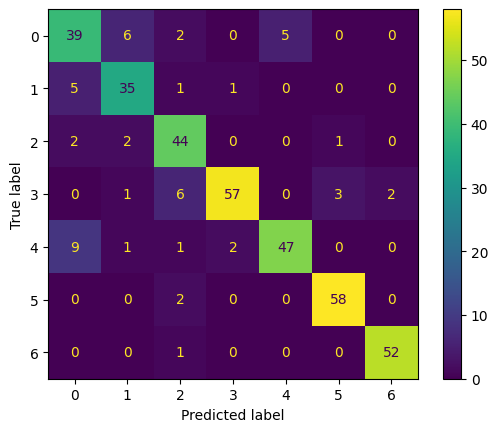

In [174]:
y_pred = grid_ext_norm.predict(X_norm_test)
cm = confusion_matrix(y_norm_test, y_pred)
report = classification_report(y_norm_test, y_pred, output_dict=True)
df_ex_norm = pd.DataFrame(report).transpose()
print(classification_report(y_norm_test, y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [175]:
df_ex_norm

,precision,recall,f1-score,support
0,0.709091,0.750000,0.728972,52.000000
1,0.777778,0.833333,0.804598,42.000000
2,0.771930,0.897959,0.830189,49.000000
3,0.950000,0.826087,0.883721,69.000000
4,0.903846,0.783333,0.839286,60.000000
5,0.935484,0.966667,0.950820,60.000000
6,0.962963,0.981132,0.971963,53.000000
accuracy,0.862338,0.862338,0.862338,0.862338
macro avg,0.858727,0.862645,0.858507,385.000000
weighted avg,0.868340,0.862338,0.863054,385.000000


In [141]:
param_grid_xgb = {
    "n_estimators": [300, 400, 500],
    "max_depth": [3, 5, 7, 10],
	"learning_rate": [0.05, 0.1, 0.2, 0.3]
}

In [142]:
# X_norm_train, X_norm_test, y_norm_train, y_norm_test
# X_var_train, X_var_test, y_var_train, y_var_test
# X_f_train, X_f_test, y_f_train, y_f_test
# X_mi_train, X_mi_test, y_mi_train, y_mi_test

In [143]:
# grid_variance = GridSearchCV(XGBClassifier(objective='multi:softmax'), param_grid_xgb, scoring=scoring, cv = 5, refit='accuracy') 
grid_variance = GridSearchCV(XGBClassifier(objective='multi:softmax'), param_grid_xgb, cv = 5) 
grid_variance.fit(X_var_train, y_var_train)
print("Selected using variance threshold: ", grid_variance.best_score_, grid_variance.best_params_)

Selected using variance threshold:  0.9075595414357629 {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300}


              precision    recall  f1-score   support

           0       0.87      0.79      0.83        52
           1       0.77      0.88      0.82        42
           2       0.82      0.94      0.88        49
           3       0.94      0.86      0.89        69
           4       0.98      0.83      0.90        60
           5       0.97      0.97      0.97        60
           6       0.87      0.98      0.92        53

    accuracy                           0.89       385
   macro avg       0.89      0.89      0.89       385
weighted avg       0.90      0.89      0.89       385



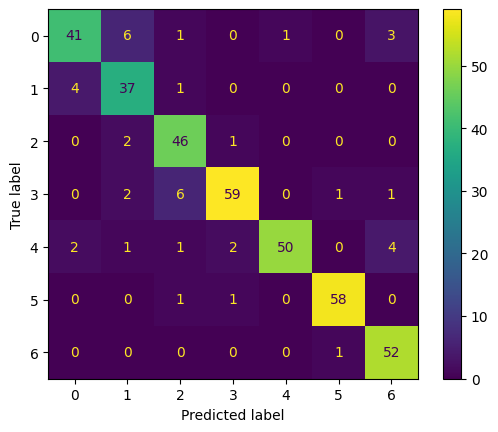

In [176]:
y_pred = grid_variance.predict(X_var_test)
cm = confusion_matrix(y_var_test, y_pred)
report = classification_report(y_var_test, y_pred, output_dict=True)
df_xgb_var = pd.DataFrame(report).transpose()
print(classification_report(y_var_test, y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [145]:
grid_mi = GridSearchCV(XGBClassifier(objective='multi:softmax'), param_grid_xgb, cv = 5) 
grid_mi.fit(X_mi_train, y_mi_train) 
print("Selected using mutual information: ", grid_mi.best_score_, grid_mi.best_params_)


Selected using mutual information:  0.9121155717246922 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}


              precision    recall  f1-score   support

           0       0.83      0.87      0.85        52
           1       0.77      0.88      0.82        42
           2       0.81      0.88      0.84        49
           3       0.97      0.87      0.92        69
           4       0.94      0.82      0.87        60
           5       0.98      0.97      0.97        60
           6       0.93      1.00      0.96        53

    accuracy                           0.90       385
   macro avg       0.89      0.90      0.89       385
weighted avg       0.90      0.90      0.90       385



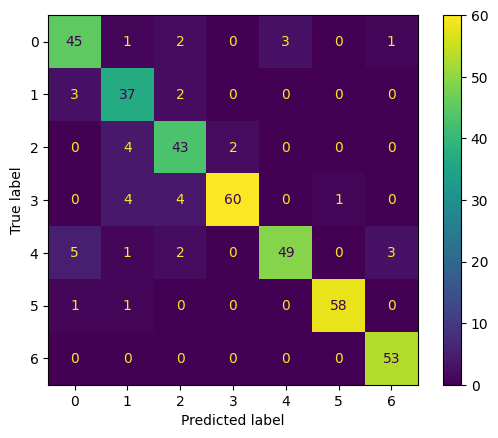

In [177]:
y_pred = grid_mi.predict(X_mi_test)
cm = confusion_matrix(y_mi_test, y_pred)
report = classification_report(y_mi_test, y_pred, output_dict=True)
df_xgb_mi = pd.DataFrame(report).transpose()
print(classification_report(y_mi_test, y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [147]:
grid_f = GridSearchCV(XGBClassifier(objective='multi:softmax'), param_grid_xgb, cv = 5) 
grid_f.fit(X_f_train, y_f_train) 
print("Selected using f-classif: ",grid_f.best_score_, grid_f.best_params_)


Selected using f-classif:  0.9238271500486483 {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}


              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.87      0.93      0.90        42
           2       0.89      0.96      0.92        49
           3       0.97      0.90      0.93        69
           4       0.98      0.82      0.89        60
           5       1.00      0.98      0.99        60
           6       0.96      1.00      0.98        53

    accuracy                           0.93       385
   macro avg       0.93      0.94      0.93       385
weighted avg       0.94      0.93      0.93       385



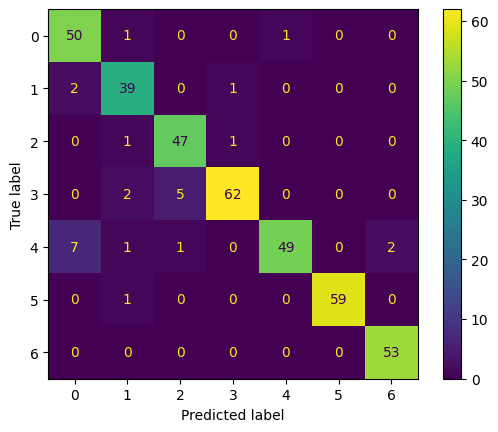

In [178]:
y_pred = grid_f.predict(X_f_test)
cm = confusion_matrix(y_f_test, y_pred)
report = classification_report(y_f_test, y_pred, output_dict=True)
df_xgb_f = pd.DataFrame(report).transpose()
print(classification_report(y_f_test, y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [149]:
grid = GridSearchCV(XGBClassifier(objective='multi:softmax'), param_grid_xgb, cv = 5) 
grid.fit(X_norm_train, y_norm_train) 
print("No selection: ",grid.best_score_, grid.best_params_)

No selection:  0.9186217691103685 {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 500}


              precision    recall  f1-score   support

           0       0.85      0.87      0.86        52
           1       0.88      0.88      0.88        42
           2       0.87      0.96      0.91        49
           3       0.94      0.88      0.91        69
           4       0.96      0.83      0.89        60
           5       0.98      0.98      0.98        60
           6       0.90      1.00      0.95        53

    accuracy                           0.91       385
   macro avg       0.91      0.92      0.91       385
weighted avg       0.92      0.91      0.91       385



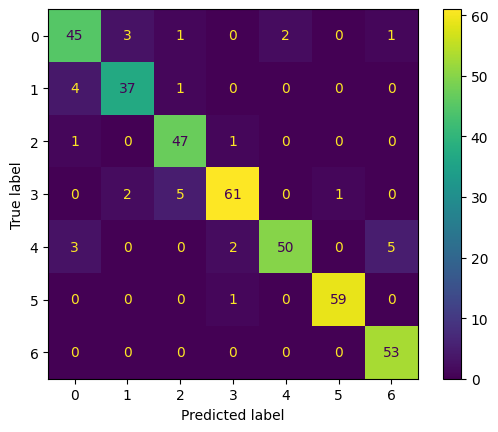

In [179]:
y_pred = grid.predict(X_norm_test)
cm = confusion_matrix(y_norm_test, y_pred)
report = classification_report(y_norm_test, y_pred, output_dict=True)
df_xgb_norm = pd.DataFrame(report).transpose()
print(classification_report(y_norm_test, y_pred))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [181]:
df_xgb_var

,precision,recall,f1-score,support
0,0.872340,0.788462,0.828283,52.000000
1,0.770833,0.880952,0.822222,42.000000
2,0.821429,0.938776,0.876190,49.000000
3,0.936508,0.855072,0.893939,69.000000
4,0.980392,0.833333,0.900901,60.000000
5,0.966667,0.966667,0.966667,60.000000
6,0.866667,0.981132,0.920354,53.000000
accuracy,0.890909,0.890909,0.890909,0.890909
macro avg,0.887834,0.892056,0.886937,385.000000
weighted avg,0.897046,0.890909,0.891044,385.000000


In [182]:
df_xgb_mi


,precision,recall,f1-score,support
0,0.833333,0.865385,0.849057,52.000000
1,0.770833,0.880952,0.822222,42.000000
2,0.811321,0.877551,0.843137,49.000000
3,0.967742,0.869565,0.916031,69.000000
4,0.942308,0.816667,0.875000,60.000000
5,0.983051,0.966667,0.974790,60.000000
6,0.929825,1.000000,0.963636,53.000000
accuracy,0.896104,0.896104,0.896104,0.896104
macro avg,0.891202,0.896684,0.891982,385.000000
weighted avg,0.901401,0.896104,0.896790,385.000000


In [183]:
df_xgb_f


,precision,recall,f1-score,support
0,0.847458,0.961538,0.900901,52.000000
1,0.866667,0.928571,0.896552,42.000000
2,0.886792,0.959184,0.921569,49.000000
3,0.968750,0.898551,0.932331,69.000000
4,0.980000,0.816667,0.890909,60.000000
5,1.000000,0.983333,0.991597,60.000000
6,0.963636,1.000000,0.981481,53.000000
accuracy,0.932468,0.932468,0.932468,0.932468
macro avg,0.930472,0.935406,0.930763,385.000000
weighted avg,0.936720,0.932468,0.932360,385.000000


In [184]:
df_xgb_norm

,precision,recall,f1-score,support
0,0.849057,0.865385,0.857143,52.000000
1,0.880952,0.880952,0.880952,42.000000
2,0.870370,0.959184,0.912621,49.000000
3,0.938462,0.884058,0.910448,69.000000
4,0.961538,0.833333,0.892857,60.000000
5,0.983333,0.983333,0.983333,60.000000
6,0.898305,1.000000,0.946429,53.000000
accuracy,0.914286,0.914286,0.914286,0.914286
macro avg,0.911717,0.915178,0.911969,385.000000
weighted avg,0.916508,0.914286,0.913878,385.000000
